# Twitter-Sentiment-Analysis

The objective of this task is to detect hate speech in tweets. We will classify a tweet containing hate speech if it has a racist or sexist comment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

 - The dataset was retrieved from Kaggle . https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech/downloads/twitter-sentiment-analysis-hatred-speech.zip/1 
 
 
 - The training sample of tweets and labels, where label ‘1’ denotes the tweet is racist/sexist and label and
  ‘0’ denotes the tweet is not racist/sexist, our objective is to predict the labels on the given test dataset are accurate or not.

In [1]:
import numpy as np
import pandas as pd
import re
import nltk

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train_tweet.csv')
test = pd.read_csv('test_tweets.csv')

print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [5]:
train.isnull().any()
test.isnull().any()

id       False
tweet    False
dtype: bool

In [6]:
train[train['label'] == 0].head(10)

# Negative comments from train datset.

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [7]:
train[train['label'] == 1].head(10)

# Positive comments from train dataset

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


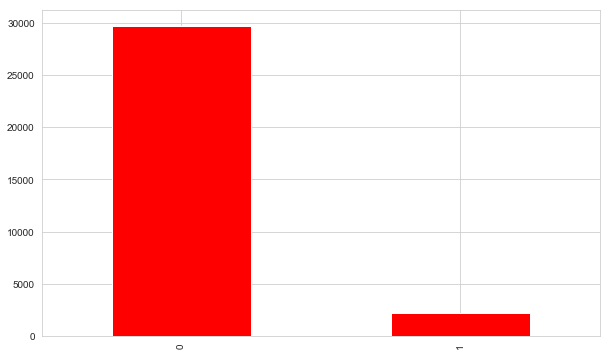

In [8]:
train['label'].value_counts().plot.bar(color = 'red',figsize = (10,6))

**The distribution of tweets.**

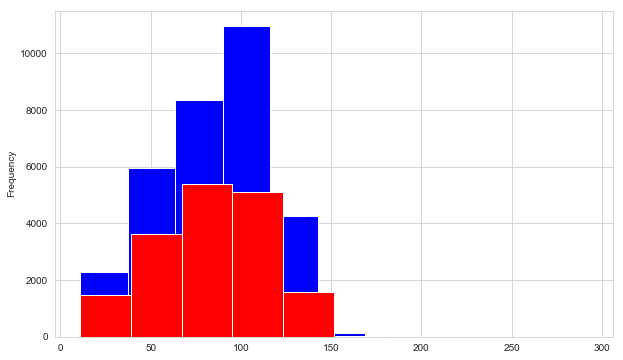

In [9]:
length_train = train['tweet'].str.len().plot.hist(color = 'blue', figsize = (10, 6))
length_test = test['tweet'].str.len().plot.hist(color = 'red', figsize = (10,6))

**Adding a column length**

In [10]:
train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

train.head(10)

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,50


In [11]:
train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

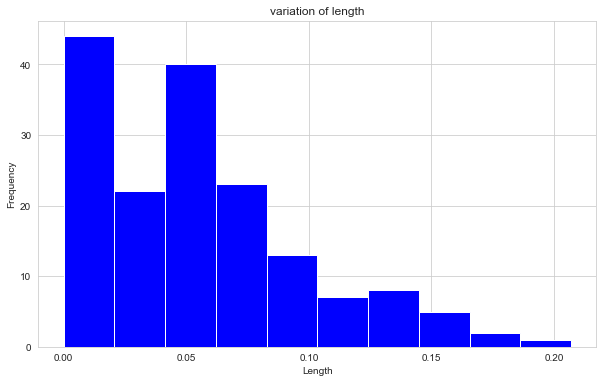

In [12]:
train.groupby('len').mean()['label'].plot.hist(color = 'blue', figsize = (10,6),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

Text(0.5, 1.0, 'Top 30 Words that Occur Frequently')

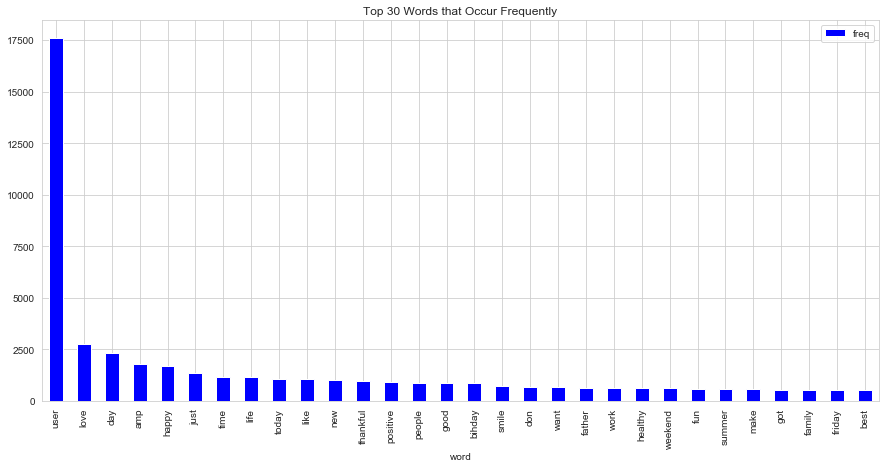

In [13]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15,7), color = 'blue')
plt.title("Top 30 Words that Occur Frequently")

Text(0.5, 1.0, 'WordCloud from Reviews')

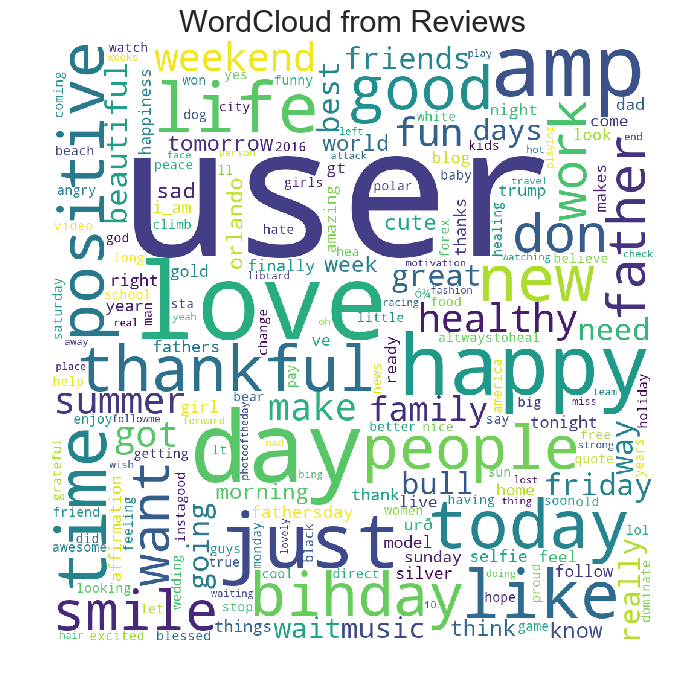

In [14]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8), dpi=100)
plt.imshow(wordcloud)
plt.axis('off')
plt.title("WordCloud from Reviews", fontsize = 22)

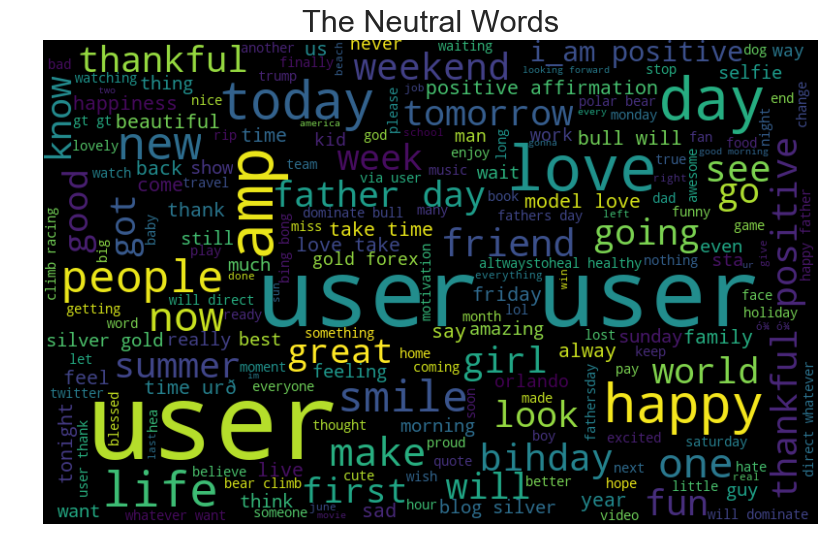

In [15]:
normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10,8),dpi=100)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words',fontsize=22)
plt.show()

# The default background is black and its better to differentiate.

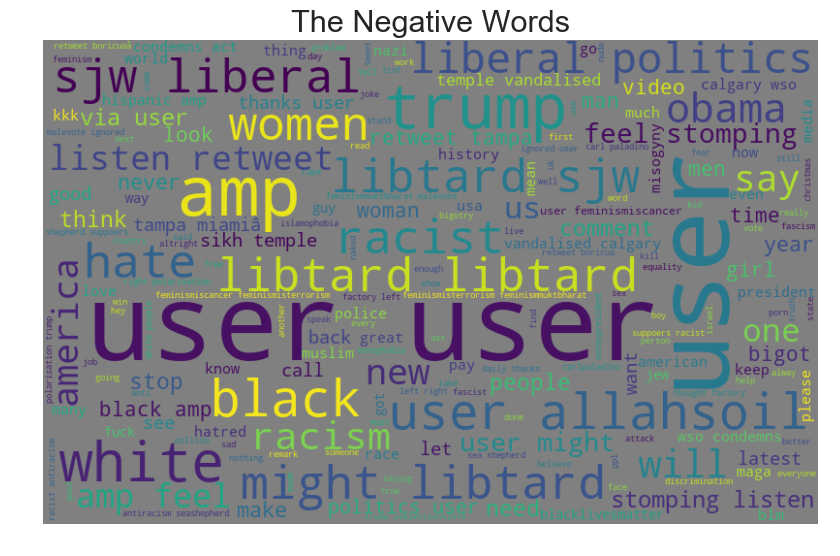

In [37]:
negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color = 'grey', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10,8),dpi=100)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words', fontsize=22)
plt.show()

**All the hashtags #** 

In [17]:
def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [18]:
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

**# selecting top 20 most frequent hashtags**

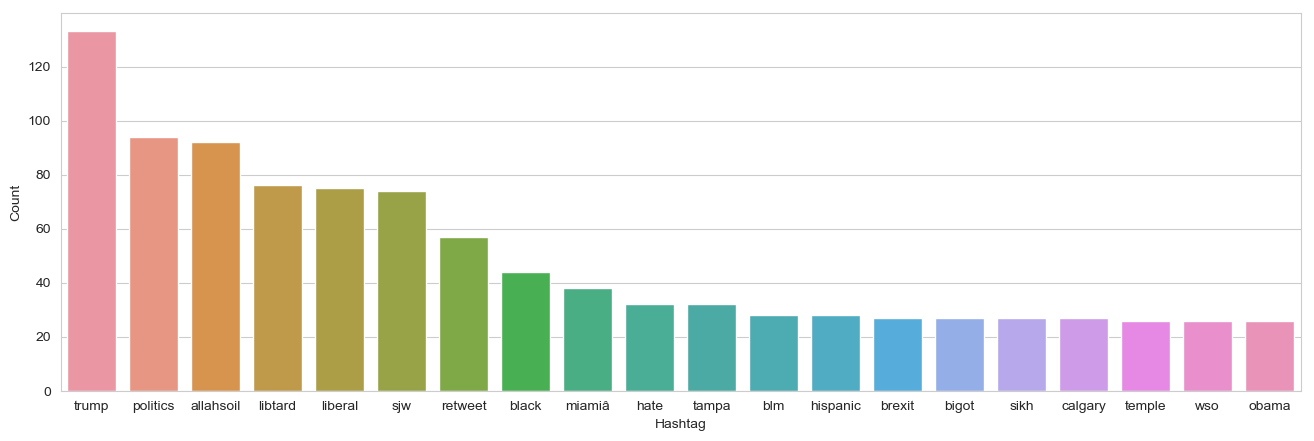

In [19]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

   
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5),dpi=100)
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [20]:
tokenized_tweet = train['tweet'].apply(lambda x: x.split()) 
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200,                         # desired no. of features/independent variables 
            window=5,                         # context window size
            min_count=2,
            sg = 1,                            # 1 for skip-gram model
            hs = 0,
            negative = 10,                    # for negative sampling
            workers= 2,                       # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=20)

(6109793, 8411580)

In [21]:
model_w2v.wv.most_similar(positive = "dinner")

[('spaghetti', 0.6924636363983154),
 ('#prosecco', 0.6428799629211426),
 ('#wanderlust', 0.615543782711029),
 ('podium', 0.598807692527771),
 ('snuggle', 0.5968145728111267),
 ('sister!!', 0.5961586236953735),
 ('toes', 0.5953971147537231),
 ('#deutschland', 0.5936251282691956),
 ('galway', 0.5932607054710388),
 ('#demoday', 0.592305064201355)]

In [22]:
model_w2v.wv.most_similar(positive = "cancer")

[('champion,', 0.733789324760437),
 ('law.', 0.720473051071167),
 ('level.', 0.7096865177154541),
 ('ways.', 0.7029524445533752),
 ('spots.', 0.6997485160827637),
 ("society's", 0.6982176303863525),
 ('targeted', 0.6982133388519287),
 ('ownership', 0.6967710256576538),
 ('aol', 0.6961889266967773),
 ('answer.', 0.6947392225265503)]

In [23]:
model_w2v.wv.most_similar(positive = "apple")

[('mytraining', 0.7177538871765137),
 ('"mytraining"', 0.7153800129890442),
 ('training"', 0.697950005531311),
 ('app,', 0.6459075212478638),
 ('ta', 0.6117618083953857),
 ('"my', 0.6091354489326477),
 ('app', 0.6033614873886108),
 ('bees', 0.5753408074378967),
 ('heroku', 0.5747355222702026),
 ('humans.', 0.5675957202911377)]

In [24]:
model_w2v.wv.most_similar(positive = "trump")

[('donald', 0.5587567090988159),
 ('carl', 0.5540615320205688),
 ('unfit', 0.5539607405662537),
 ('paladino', 0.5525181293487549),
 ('fuhered', 0.5505568385124207),
 ('#dumptrump', 0.546798825263977),
 ('suppoer', 0.5382028818130493),
 ('churchill', 0.531308650970459),
 ('rally.', 0.529400646686554),
 ('ally', 0.5292609930038452)]

In [25]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [26]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

[LabeledSentence(words=['@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['@user', '@user', 'thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx.', '#disapointed', '#getthanked'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 LabeledSentence(words=['factsguide:', 'society', 'now', '#motivation'], tags=['tweet_4']),
 LabeledSentence(words=['[2/2]', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave.', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there.', '#allshowandn

In [27]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kirandarshak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [29]:
test_corpus = []

for i in range(0, 17197):
  review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

**Creating bag of words**

In [30]:


from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


In [31]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)

(17197, 2500)


**Splitting the data**

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3, random_state = 101)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(22373, 2500)
(9589, 2500)
(22373,)
(9589,)


**Scaling the data**

In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.994636392079739
Validation Accuracy : 0.9515069350297215
F1 score : 0.5974025974025973
[[8779  161]
 [ 304  345]]


In [35]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9852500782192821
Validation Accuracy : 0.944936906872458
f1 score : 0.6077265973254086
[[8652  288]
 [ 240  409]]


In [36]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9992401555446296
Validation Accuracy : 0.9356554385233079
f1 score : 0.539208364451083
[[8611  329]
 [ 288  361]]
